In [2]:
%matplotlib inline

import os
import sys
import copy
import aplpy
import numpy as np
#np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)


sys.path.append('../lib/')
from hdsources import *
from utils import *
from graph import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


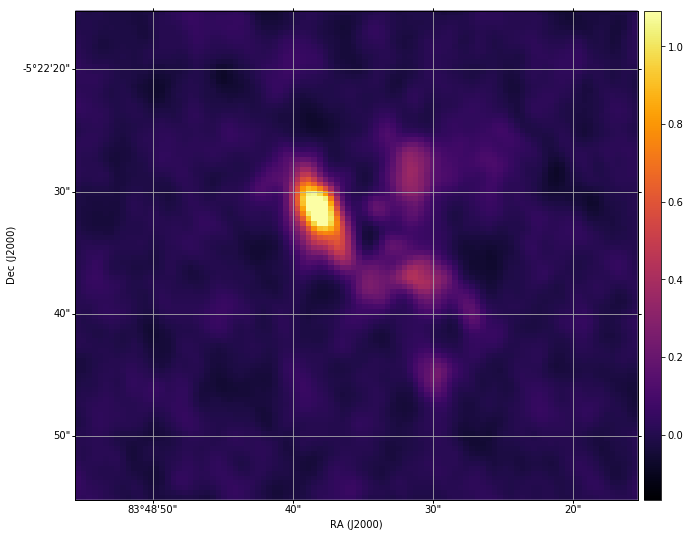

In [67]:
#fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
fits_path = '../data/images/Orion.cont.image.fits'

data, wcs = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs)

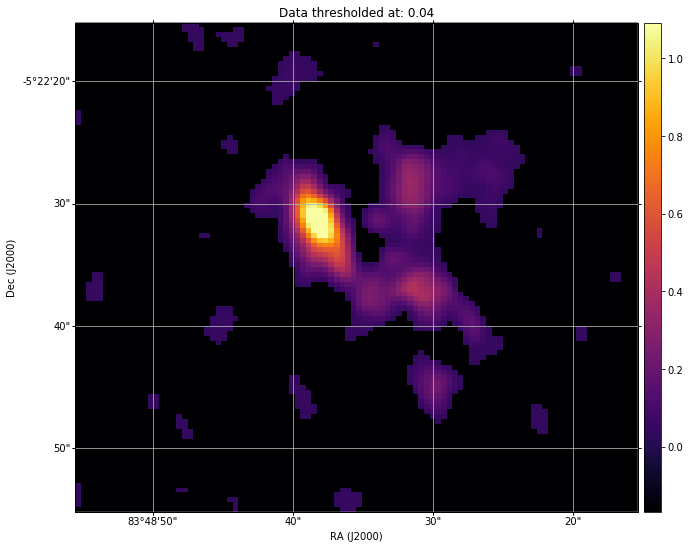

In [80]:
thresholded_image_plot(data, 0.04, wcs=wcs)

### HGBS Survey

In [55]:
#fits_path = '../data/HGBS/HGBS_aquilaM2_column_density_map.fits'
fits_path = '../data/HGBS/HGBS_aquilaM2_dust_temperature_map.fits'
#fits_path = '../data/HGBS/chamI-coldens.fits'
#fits_path = '../data/HGBS/chamI-temperature.fits'
#fits_path = '../data/HGBS/chamII-coldens.fits'
#fits_path = '../data/HGBS/chamII-temperature.fits'
#fits_path = '../data/HGBS/chamIII-coldens.fits'
#fits_path = '../data/HGBS/chamIII-temperature.fits'

data, wcs = load_data(fits_path)

INFO: Auto-setting vmin to  1.200e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.401e+01 [aplpy.core]


/Users/martin/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


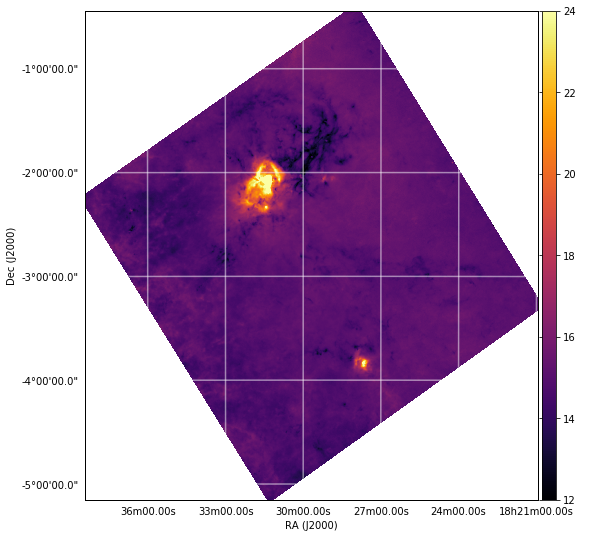

In [56]:
fig = aplpy.FITSFigure(fits_path)
fig.show_colorscale(cmap='inferno')
fig.add_colorbar()
fig.show_grid()

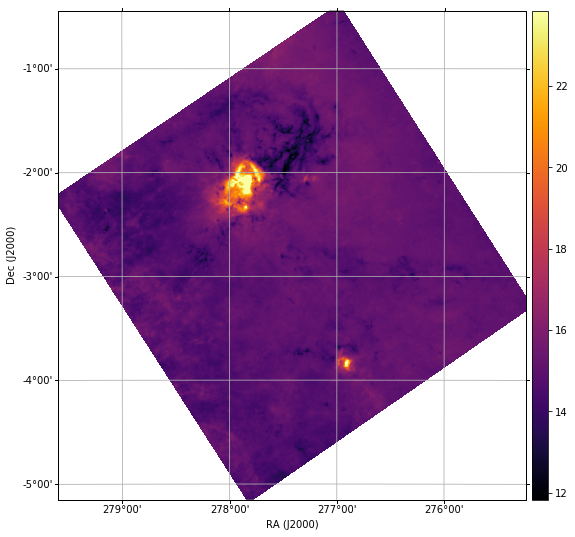

In [59]:
image_plot(data, wcs=wcs)

***
***

## Orion-Monoceros

In [60]:
fits_path = '../data/SCIMES/orion_12CO_mom0.fits'
#fits_path = '../data/SCIMES/orion_12CO.fits'
data, wcs = load_data(fits_path)

INFO: Auto-setting vmin to -8.368e+00 [aplpy.core]
INFO: Auto-setting vmax to  5.954e+01 [aplpy.core]


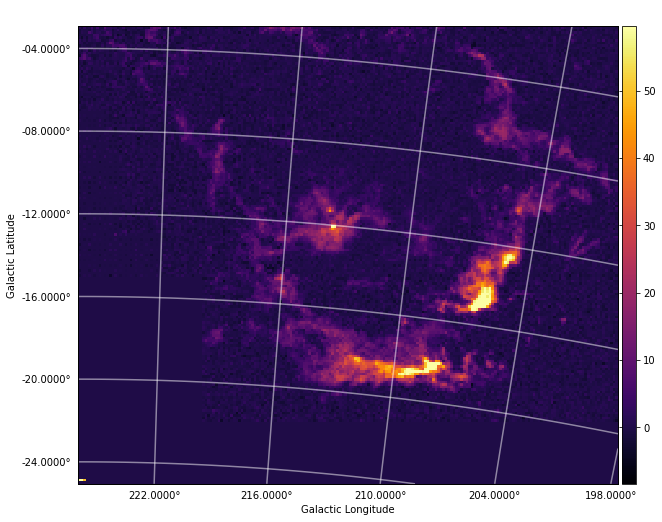

In [63]:
fig = aplpy.FITSFigure(fits_path, convention='calabretta')
fig.show_colorscale(cmap='inferno')
fig.add_colorbar()
fig.show_grid()

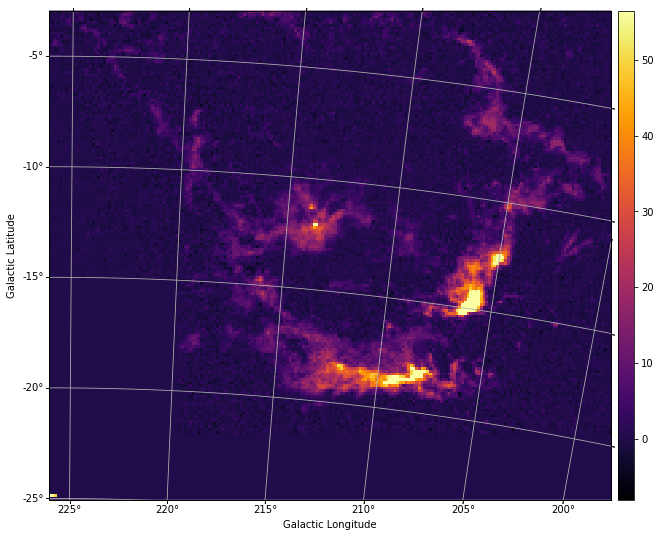

In [65]:
image_plot(data, wcs=wcs)

## KMEANS Clustering approach

In [22]:
from sklearn.cluster import KMeans

In [31]:
kmeans = KMeans(n_clusters=2, random_state=0, n_jobs=2)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=2, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [42]:
mask = (kmeans.labels_).reshape(data.shape)
mask = mask.astype(bool)

In [43]:
data_ = np.copy(data)
data_[~mask] = 0

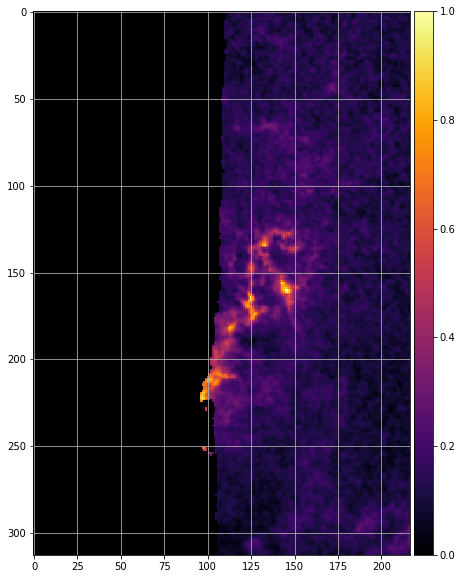

In [44]:
image_plot(data_, cmap=plt.cm.inferno)

In [6]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename

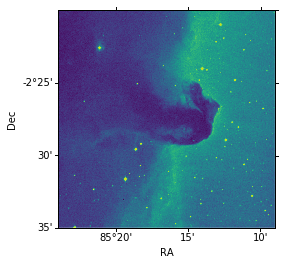

In [12]:
fig = plt.figure()
fig.add_subplot(111, projection=wcs)
plt.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
plt.xlabel('RA')
plt.ylabel('Dec')